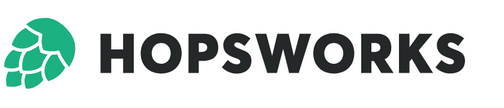

# Batch Predictions

**Note**: you may get an error when installing hopsworks on Colab, and it is safe to ignore it.

## 🗒️ This notebook is divided in 3 main sections:
1. **Read a batch of data, ready for batch inference**
2. **Download & use the model to generate predictions using the inference data**
3. **Save the UI output as a .png graph, and write the predictions to a Feature Group**

In [ ]:
!pip install -U hopsworks --quiet

In [1]:
import hopsworks

project = hopsworks.login()

fs = project.get_feature_store()
mr = project.get_model_registry()

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/2238


Connected. Call `.close()` to terminate connection gracefully.
Connected. Call `.close()` to terminate connection gracefully.


In [10]:
import datetime
start_date = (datetime.datetime.now() - datetime.timedelta(hours=1124)) 
end_date = (datetime.datetime.now()) 
print(start_date)
print(end_date)

2022-09-01 14:52:18.831707
2022-10-18 10:52:18.831770


In [11]:
feature_view = fs.get_feature_view("cc_trans_fraud", 1)
feature_view.init_batch_scoring(training_dataset_version=1)

In [ ]:
transactions_df = feature_view.get_batch_data()

2022-10-18 10:57:46,726 INFO: USE `serverlessmltm_featurestore`
2022-10-18 10:57:47,749 INFO: WITH right_fg0 AS (SELECT *
FROM (SELECT `fg2`.`tid` `tid`, `fg2`.`datetime` `datetime`, `fg2`.`tid` `join_pk_tid`, `fg2`.`cc_num` `join_pk_cc_num`, `fg2`.`datetime` `join_evt_datetime`, `fg0`.`cc_num` `cc_num`, `fg0`.`category` `category`, `fg0`.`amount` `amount`, `fg0`.`age_at_transaction` `age_at_transaction`, `fg0`.`days_until_card_expires` `days_until_card_expires`, `fg0`.`loc_delta_t_minus_1` `loc_delta_t_minus_1`, `fg0`.`time_delta_t_minus_1` `time_delta_t_minus_1`, RANK() OVER (PARTITION BY `fg2`.`cc_num`, `fg2`.`datetime` ORDER BY `fg0`.`datetime` DESC) pit_rank_hopsworks
FROM `serverlessmltm_featurestore`.`transactions_fraud_label_1` `fg2`
INNER JOIN `serverlessmltm_featurestore`.`cc_trans_fraud_1` `fg0` ON `fg2`.`cc_num` = `fg0`.`cc_num` AND `fg2`.`datetime` >= `fg0`.`datetime`) NA
WHERE `pit_rank_hopsworks` = 1), right_fg1 AS (SELECT *
FROM (SELECT `fg2`.`tid` `tid`, `fg2`.`datetim

,tid,datetime,cc_num,category,amount,age_at_transaction,days_until_card_expires,loc_delta_t_minus_1,time_delta_t_minus_1,trans_volume_mstd,trans_volume_mavg,trans_freq,loc_delta_mavg
0,27ebdddf55ccc20fde1fd9bd865f3554,1642124157000,4000323325541926,4,0.002688,0.091765,0.135869,0.105560,0.133263,0.005060,0.004870,0.004870,0.268641
1,13c781e0d38897f5ff2a82a2570e3956,1644982438000,4000323325541926,2,0.000197,0.092858,0.119791,0.073897,0.005674,0.005376,0.005185,0.005185,0.231621
2,7ffbcd159ad5caece56718be3cd2d5a8,1643714740000,4001760125154740,0,0.000694,0.332314,0.289735,0.076424,0.018502,0.011450,0.011261,0.011261,0.246675
3,7e48053654729e1b5a200519c63addde,1643771285000,4001760125154740,2,0.001595,0.332336,0.289417,0.049327,0.057985,0.011058,0.010869,0.010869,0.077431
4,fe56fea2dcc97844c7c535b1a701358d,1644489635000,4001760125154740,0,0.002619,0.332610,0.285376,0.091782,0.072939,0.007272,0.007082,0.007082,0.150937
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106015,2d15c9ee98e969ca887583434e6e6f36,1643984113000,4999661259770133,0,0.008672,0.944472,0.480679,0.200306,0.023177,0.009705,0.009515,0.009515,0.316527
106016,4cf15a303c7b2f77115e2c5ddd625c75,1645603006000,4999661259770133,0,0.002505,0.945091,0.471572,0.080075,0.007882,0.006279,0.006089,0.006089,0.221922
106017,d0df4a240a9d6306a6975dbab2c17e17,1644039237000,4999763787658689,0,0.000018,0.356383,0.495435,0.072830,0.030585,0.003430,0.003239,0.003239,0.223181
106018,f8a8c97a582c1280fcb1ffb1d6079d97,1644185459000,4999763787658689,2,0.001130,0.356439,0.494613,0.056585,0.045313,0.004172,0.003981,0.003981,0.165345


In [18]:
features_df = transactions_df.iloc[: , 3:]
features_df

,category,amount,age_at_transaction,days_until_card_expires,loc_delta_t_minus_1,time_delta_t_minus_1,trans_volume_mstd,trans_volume_mavg,trans_freq,loc_delta_mavg
0,4,0.002688,0.091765,0.135869,0.105560,0.133263,0.005060,0.004870,0.004870,0.268641
1,2,0.000197,0.092858,0.119791,0.073897,0.005674,0.005376,0.005185,0.005185,0.231621
2,0,0.000694,0.332314,0.289735,0.076424,0.018502,0.011450,0.011261,0.011261,0.246675
3,2,0.001595,0.332336,0.289417,0.049327,0.057985,0.011058,0.010869,0.010869,0.077431
4,0,0.002619,0.332610,0.285376,0.091782,0.072939,0.007272,0.007082,0.007082,0.150937
...,...,...,...,...,...,...,...,...,...,...
106015,0,0.008672,0.944472,0.480679,0.200306,0.023177,0.009705,0.009515,0.009515,0.316527
106016,0,0.002505,0.945091,0.471572,0.080075,0.007882,0.006279,0.006089,0.006089,0.221922
106017,0,0.000018,0.356383,0.495435,0.072830,0.030585,0.003430,0.003239,0.003239,0.223181
106018,2,0.001130,0.356439,0.494613,0.056585,0.045313,0.004172,0.003981,0.003981,0.165345


In [19]:
import joblib

the_model = mr.get_model("cc_fraud", version=1)
model_dir = the_model.download()

model = joblib.load(model_dir + "/cc_fraud_model.pkl")

## <span style="color:#ff5f27;">  Use the model to score transactions </span>

In [20]:
predictions = model.predict(features_df)

In [60]:
predictions.shape

(106020,)

In [22]:
transactions_df['prediction'] = predictions.tolist()

In [23]:
results_df = transactions_df.copy()[["tid", "cc_num", "datetime", "prediction"]]

In [24]:
results_df.loc[:,'batch_start_date'] = start_date
results_df

,tid,cc_num,datetime,prediction,batch_start_date
0,27ebdddf55ccc20fde1fd9bd865f3554,4000323325541926,1642124157000,0,2022-09-01 14:52:18.831707
1,13c781e0d38897f5ff2a82a2570e3956,4000323325541926,1644982438000,0,2022-09-01 14:52:18.831707
2,7ffbcd159ad5caece56718be3cd2d5a8,4001760125154740,1643714740000,0,2022-09-01 14:52:18.831707
3,7e48053654729e1b5a200519c63addde,4001760125154740,1643771285000,0,2022-09-01 14:52:18.831707
4,fe56fea2dcc97844c7c535b1a701358d,4001760125154740,1644489635000,0,2022-09-01 14:52:18.831707
...,...,...,...,...,...
106015,2d15c9ee98e969ca887583434e6e6f36,4999661259770133,1643984113000,0,2022-09-01 14:52:18.831707
106016,4cf15a303c7b2f77115e2c5ddd625c75,4999661259770133,1645603006000,0,2022-09-01 14:52:18.831707
106017,d0df4a240a9d6306a6975dbab2c17e17,4999763787658689,1644039237000,0,2022-09-01 14:52:18.831707
106018,f8a8c97a582c1280fcb1ffb1d6079d97,4999763787658689,1644185459000,0,2022-09-01 14:52:18.831707


In [25]:
results_fg = fs.get_or_create_feature_group(
    name="cc_fraud_results",
    version=1,
    description="Number of predicted frauds by card",
    primary_key=["cc_num"],
    event_time="datetime"
)
results_fg.insert(results_df)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/2238/fs/2183/fg/3567


Uploading Dataframe: 0.00% |          | Rows 0/106020 | Elapsed Time: 00:00 | Remaining Time: ?

Launching offline feature group backfill job...
Backfill Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/2238/jobs/named/cc_fraud_results_1_offline_fg_backfill/executions


(<hsfs.core.job.Job at 0x7fbda8e23820>, None)

In [27]:
results_df.loc[:,'batch_end_date'] = end_date
results_df

,tid,cc_num,datetime,prediction,batch_start_date,batch_end_date
0,27ebdddf55ccc20fde1fd9bd865f3554,4000323325541926,1642124157000,0,2022-09-01 14:52:18.831707,2022-10-18 10:52:18.831770
1,13c781e0d38897f5ff2a82a2570e3956,4000323325541926,1644982438000,0,2022-09-01 14:52:18.831707,2022-10-18 10:52:18.831770
2,7ffbcd159ad5caece56718be3cd2d5a8,4001760125154740,1643714740000,0,2022-09-01 14:52:18.831707,2022-10-18 10:52:18.831770
3,7e48053654729e1b5a200519c63addde,4001760125154740,1643771285000,0,2022-09-01 14:52:18.831707,2022-10-18 10:52:18.831770
4,fe56fea2dcc97844c7c535b1a701358d,4001760125154740,1644489635000,0,2022-09-01 14:52:18.831707,2022-10-18 10:52:18.831770
...,...,...,...,...,...,...
106015,2d15c9ee98e969ca887583434e6e6f36,4999661259770133,1643984113000,0,2022-09-01 14:52:18.831707,2022-10-18 10:52:18.831770
106016,4cf15a303c7b2f77115e2c5ddd625c75,4999661259770133,1645603006000,0,2022-09-01 14:52:18.831707,2022-10-18 10:52:18.831770
106017,d0df4a240a9d6306a6975dbab2c17e17,4999763787658689,1644039237000,0,2022-09-01 14:52:18.831707,2022-10-18 10:52:18.831770
106018,f8a8c97a582c1280fcb1ffb1d6079d97,4999763787658689,1644185459000,0,2022-09-01 14:52:18.831707,2022-10-18 10:52:18.831770


In [28]:
import numpy as np
unique, counts = np.unique(predictions, return_counts=True)

In [29]:
print(np.asarray((unique, counts)).T)

[[     0 105866]
 [     1    154]]


In [30]:
print(counts[1])

154


In [31]:
import pandas as pd
data = {'datetime': [start_date], 'num_predicted_fraud': [counts[1]]}
df = pd.DataFrame.from_dict(data)

### Write the number of predicted credit card frauds to a Feature Group


In [32]:
fraud_fg = fs.get_or_create_feature_group(
    name="predicted_fraud",
    version=1,
    description="Number of predicted frauds by day",
    primary_key=["datetime"],
    event_time="datetime"
)
fraud_fg.insert(df)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/2238/fs/2183/fg/3568


Uploading Dataframe: 0.00% |          | Rows 0/1 | Elapsed Time: 00:00 | Remaining Time: ?

Launching offline feature group backfill job...
Backfill Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/2238/jobs/named/predicted_fraud_1_offline_fg_backfill/executions


(<hsfs.core.job.Job at 0x7fbda8a272b0>, None)

### Create a graph of the numer of suspected fraudulent transactions over time

First, read up all the historical suspected fraudulent transactions 

In [33]:
history_df = fraud_fg.read()

2022-10-18 11:07:42,281 INFO: USE `serverlessmltm_featurestore`
2022-10-18 11:07:43,347 INFO: SELECT `fg0`.`datetime` `datetime`, `fg0`.`num_predicted_fraud` `num_predicted_fraud`
FROM `serverlessmltm_featurestore`.`predicted_fraud_1` `fg0`


In [34]:
# Sort the historical fraud predictions by day
history_df = history_df.sort_values(by = ['datetime'])  

In [35]:
history_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 0 to 0
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   datetime             1 non-null      datetime64[ns]
 1   num_predicted_fraud  1 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 24.0 bytes


In [36]:
history_df['day_of_year'] = history_df['datetime'].dt.dayofyear 

history_df

,datetime,num_predicted_fraud,day_of_year
0,2022-09-01 14:52:18.831,154,244


<Figure size 1500x700 with 0 Axes>

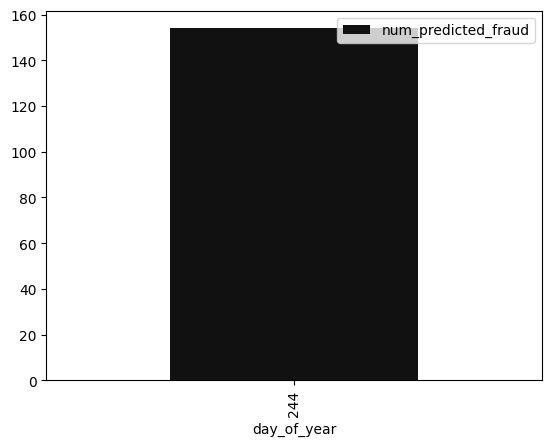

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

color='#111111'
plt.figure(figsize=(15, 7))

history_df.plot(kind='bar', x='day_of_year', y='num_predicted_fraud', color=color)

plt.savefig("fraud_counts.png")
plt.show()

plt.close()


In [ ]:
from sklearn.metrics import confusion_matrix

results = confusion_matrix(y_test, y_pred)
print(results)

## Confusion matrix

In [62]:
X_train, X_test, y_train, y_test = feature_view.get_train_test_split(training_dataset_version=1)

In [66]:
y_pred = model.predict(X_test.iloc[:, 3:])

In [67]:
from sklearn.metrics import confusion_matrix

results = confusion_matrix(y_test, y_pred)
print(results)

[[21408     6]
 [    7    27]]
